<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - ML Models for Tabular Datasets <br>
<font color=696880 size=4>
    Niloufar Razani 
    
    
____

### Full Name : Ali Salesi
### Student Number : 99105334
___

<font face="Times New Roman" size=4><div dir=ltr>
In this homework we are going to implement Adaboost algorithm from scratch. Please read this chapter's <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/tree/main/Jupyter_Notebooks/Chapter_04_Tabular_Data_Models"><font face="Roboto">notebook</font></a> and then complete the #TODO sections. <br>
We will use the heart_disease.csv dataset, which you can see more details about in this <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv"><font face="Roboto">Link</font></a>.
___

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Prepration (10 points) 
1.   Load Dataset
2.   Separate target feaure
3.   Change class labels to 1 and -1
4.   Do train-test split

In [2]:
from sklearn.model_selection import train_test_split

heart_disease_pdf = pd.read_csv("heart_disease.csv")
X = heart_disease_pdf.iloc[:, :13]
y = heart_disease_pdf.iloc[:, 13]
y = y.mask(y == 0, -1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=42)

### Adaboost Algorithm Implementation (40 points)

In [3]:
from sklearn.tree import DecisionTreeClassifier

def calculate_error(y, y_pred, w):
    return np.sum(np.where(y == y_pred, 0, 1) * w)
    

def calculate_alpha(error):
    return np.log((1 - error) / error) / 2
    

def update_weights(w, alpha, y, y_pred):
    return w * np.exp(np.where(y == y_pred, -1, 1) * alpha)
    

    
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.training_errors = []

    def fit(self, X, y, M = 100):
        
        self.alphas = [] 
        self.training_errors = []
        self.M = M

        for m in range(0, M):
            
            # Set weights
            if m == 0:
                w = np.ones(y.shape[0]) / y.shape[0]
                 
            else:
                w = w / np.sum(w)
               
            
            # 1. Fit weak classifier and predict labels(using predict method) and Save it to list of weak classifiers.
            clf = DecisionTreeClassifier(max_depth=1)
            clf.fit(X, y, w)
            self.G_M.append(clf)
            y_pred = clf.predict(X)


            # 2. Calculate error of this weak classifier and save it to list of trainingterrors.
            err = calculate_error(y, y_pred, w)
            self.training_errors.append(err)


            # 3. Calculate alpha of this weak classifier and save it to list of alphas.
            alpha = calculate_alpha(err)
            self.alphas.append(alpha)
            
            w = update_weights(w, alpha, y, y_pred)



    def predict(self, X, ms=set([])):
        if not ms:
            ms = set([self.M])
        y_preds = []

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m
            if m + 1 in ms:
                y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)
                y_preds.append(y_pred)

        if len(y_preds) == 1:
            return y_preds[0]
        return y_preds

### Training and Evaluation (20 points)

In [4]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

#TODO : Fit model
model = AdaBoost()
model.fit(X_train, y_train)


#TODO : Predict on test data
y_pred = model.predict(X_test)


#TODO : Print evaluation metrics (Accurcy, Precission, Recall and f-score)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

Accuracy: 0.83008356545961
Precision: 0.8333333333333334
Recall: 0.8333333333333334
f1: 0.8333333333333334


In [5]:
#TODO : Do Scikit-Learn implementation of AdaBoost and print evaluation metrics
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100, algorithm="SAMME", learning_rate=1)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

Accuracy: 0.83008356545961
Precision: 0.8333333333333334
Recall: 0.8333333333333334
f1: 0.8333333333333334


### Early Stopping (15 points)

In [6]:
#TODO : Calculate validation error for different number of estimators 
#TODO : Predict on test data
ms = [i for i in range(1, 101)]
y_preds = model.predict(X_test, set(ms))


#TODO : Print evaluation metrics (Accurcy, Precission, Recall and f-score)
accs = []
precs = []
recalls = []
f1s = []
for y_pred in y_preds:
    accs.append(accuracy_score(y_test, y_pred))
    precs.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))

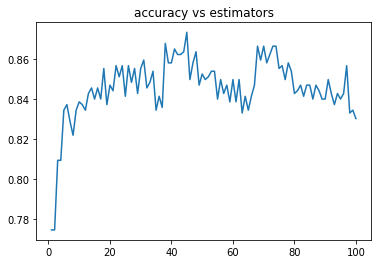

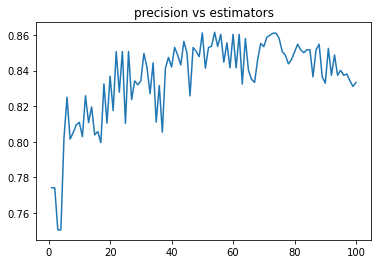

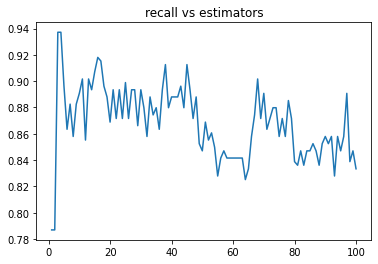

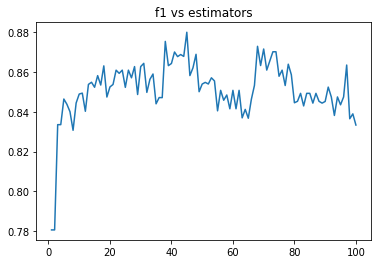

In [7]:
#TODO : Plot validation error versus number of estimators figure.
plt.plot(ms, accs)
plt.title('accuracy vs estimators')
plt.show()
plt.plot(ms, precs)
plt.title('precision vs estimators')
plt.show()
plt.plot(ms, recalls)
plt.title('recall vs estimators')
plt.show()
plt.plot(ms, f1s)
plt.title('f1 vs estimators')
plt.show()

In [8]:
#TODO : Print the best number for estimators and minimum value for validation error.
print('maximum accuracy:', ms[np.argmax(accs)])
print('maximum precision:', ms[np.argmax(precs)])
print('maximum recall:', ms[np.argmax(recalls)])
print('maximum f1 score:', ms[np.argmax(f1s)])

maximum accuracy: 45
maximum precision: 54
maximum recall: 3
maximum f1 score: 45


### Weighted Error (10 points)

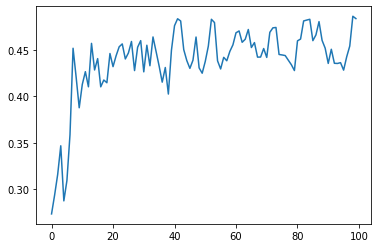

In [9]:
#TODO : Plot weighted training error versus number of estimators figure using training_errors attribute in Adaboost class.
plt.plot(model.training_errors)
plt.show()

### Question : Why does the weighted error tend to increase as the number of estimators increase? (5points)

In [10]:
# weight of samples that cannot be classified by a stump increases